In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [96]:
from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
#torch.cuda.set_device
#we use above code to run the model we want
 

In [ ]:
PATH = Path('/home/ishvi/Downloads/pascal')
list(PATH.iterdir())

In [4]:
trn_j = json.load((PATH/'pascal_train2007.json').open())
trn_j.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [5]:
IMAGES,ANNOTATIONS,CATEGORIES = ['images', 'annotations', 'categories']
trn_j[IMAGES][:5]
#saving key values as constants to make it easy to work

[{'file_name': '000012.jpg', 'height': 333, 'width': 500, 'id': 12},
 {'file_name': '000017.jpg', 'height': 364, 'width': 480, 'id': 17},
 {'file_name': '000023.jpg', 'height': 500, 'width': 334, 'id': 23},
 {'file_name': '000026.jpg', 'height': 333, 'width': 500, 'id': 26},
 {'file_name': '000032.jpg', 'height': 281, 'width': 500, 'id': 32}]

In [6]:
trn_j[ANNOTATIONS][:2]

[{'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]],
  'area': 34104,
  'iscrowd': 0,
  'image_id': 12,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0},
 {'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]],
  'area': 13110,
  'iscrowd': 0,
  'image_id': 17,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0}]

In [7]:
trn_j[CATEGORIES][:4]

[{'supercategory': 'none', 'id': 1, 'name': 'aeroplane'},
 {'supercategory': 'none', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'none', 'id': 3, 'name': 'bird'},
 {'supercategory': 'none', 'id': 4, 'name': 'boat'}]

In [8]:
FILE_NAME,ID,IMG_ID,CAT_ID,BBOX = 'file_name','id','image_id','category_id','bbox'



In [11]:
cats = {i[ID]:i['name'] for i in trn_j[CATEGORIES]}
trn_fns = {i[ID]:i[FILE_NAME] for i in trn_j[IMAGES]}


In [12]:

trn_ids=[]
for i in trn_j[IMAGES]:
    trn_ids.append(i[ID])

In [13]:
trn_ids

[12,
 17,
 23,
 26,
 32,
 33,
 34,
 35,
 36,
 42,
 44,
 47,
 48,
 61,
 64,
 66,
 73,
 77,
 78,
 83,
 89,
 91,
 104,
 112,
 122,
 129,
 133,
 134,
 138,
 140,
 141,
 147,
 153,
 154,
 159,
 161,
 162,
 163,
 164,
 171,
 173,
 174,
 187,
 189,
 192,
 193,
 194,
 198,
 200,
 207,
 209,
 219,
 220,
 222,
 225,
 228,
 235,
 242,
 250,
 256,
 259,
 262,
 263,
 276,
 278,
 282,
 288,
 294,
 296,
 306,
 307,
 311,
 312,
 317,
 320,
 325,
 331,
 334,
 337,
 344,
 347,
 349,
 355,
 359,
 367,
 370,
 372,
 379,
 382,
 387,
 391,
 394,
 395,
 400,
 404,
 406,
 407,
 411,
 416,
 430,
 431,
 438,
 446,
 450,
 454,
 463,
 468,
 469,
 470,
 474,
 476,
 477,
 484,
 489,
 496,
 503,
 508,
 516,
 518,
 519,
 522,
 524,
 525,
 526,
 528,
 535,
 537,
 541,
 544,
 549,
 550,
 552,
 554,
 555,
 559,
 565,
 577,
 583,
 589,
 590,
 592,
 597,
 605,
 609,
 612,
 620,
 622,
 625,
 632,
 633,
 635,
 648,
 654,
 657,
 671,
 672,
 680,
 685,
 688,
 689,
 695,
 699,
 700,
 709,
 710,
 711,
 726,
 729,
 731,
 733,
 7

In [15]:
JPEGS = 'VOCdevkit/VOC2007/JPEGImages'

In [31]:
im0_d = trn_j[IMAGES][0]
im0_d[FILE_NAME],im0_d[ID]

('000012.jpg', 12)

In [32]:
def hw_bb(bb): 
    return np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])

trn_anno = collections.defaultdict(lambda:[])
for o in trn_j[ANNOTATIONS]:
    if not o['ignore']:
        bb = o[BBOX]
        bb = hw_bb(bb)
        trn_anno[o[IMG_ID]].append((bb,o[CAT_ID]))
        
len(trn_anno)

2501

In [33]:
trn_anno[im0_d[ID]]

[(array([ 96, 155, 269, 350]), 7)]

In [24]:
cats[7]

'car'

In [50]:
im_a = trn_anno[im0_d[ID]]

In [53]:
im0_a = im_a[0]
im0_a

(array([ 96, 155, 269, 350]), 7)

In [25]:
trn_anno[17]

[(array([ 61, 184, 198, 278]), 15), (array([ 77,  89, 335, 402]), 13)]

In [26]:
cats[15],cats[13]

('person', 'horse')

In [27]:
bb_voc = [155, 96, 196, 174]
bb_fastai = hw_bb(bb_voc)

In [80]:
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1],a[2]-a[0]])

In [29]:
f'expected: {bb_voc}, actual: {bb_hw(bb_fastai)}'

'expected: [155, 96, 196, 174], actual: [155  96 196 174]'

In [81]:
im = open_image(IMG_PATH/im0_d[FILE_NAME])

In [82]:
im

array([[[0.27059, 0.27059, 0.26275],
        [0.25882, 0.25882, 0.25098],
        [0.26275, 0.26275, 0.2549 ],
        ...,
        [0.21569, 0.22353, 0.21961],
        [0.21176, 0.21961, 0.21569],
        [0.2    , 0.20784, 0.20392]],

       [[0.28235, 0.28235, 0.27451],
        [0.27059, 0.27059, 0.26275],
        [0.26275, 0.26275, 0.2549 ],
        ...,
        [0.20784, 0.21569, 0.21176],
        [0.19608, 0.20392, 0.2    ],
        [0.20784, 0.21569, 0.21176]],

       [[0.2549 , 0.2549 , 0.24706],
        [0.26275, 0.26275, 0.2549 ],
        [0.26667, 0.26667, 0.25882],
        ...,
        [0.23529, 0.24314, 0.23922],
        [0.23529, 0.24314, 0.23922],
        [0.22745, 0.23529, 0.23137]],

       ...,

       [[0.30196, 0.29804, 0.28235],
        [0.30588, 0.30196, 0.28627],
        [0.3098 , 0.30588, 0.29804],
        ...,
        [0.32941, 0.32941, 0.32157],
        [0.33333, 0.33333, 0.32549],
        [0.32941, 0.32941, 0.32157]],

       [[0.31373, 0.3098 , 0.29412],
  

In [83]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

In [84]:
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

In [85]:

def draw_rect(ax, b):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
    draw_outline(patch, 4)

In [86]:
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
        verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)

In [ ]:
ax = show_img(im)
b = bb_hw(im0_a[0])
draw_rect(ax, b)
draw_text(ax, b[:2], cats[im0_a[1]])

# displaying an image

In [88]:
def draw_im(im, ann):
    ax = show_img(im, figsize=(16,8))
    for b,c in ann: 
        b = bb_hw(b)
        draw_rect(ax, b)
        draw_text(ax, b[:2], cats[c], sz=16)

In [90]:

def draw_idx(i):
    im_a = trn_anno[i] # returns binding box values and the object class for image with id i
    im = open_image(IMG_PATH/trn_fns[i])
    print(im.shape)
    draw_im(im, im_a)

(364, 480, 3)


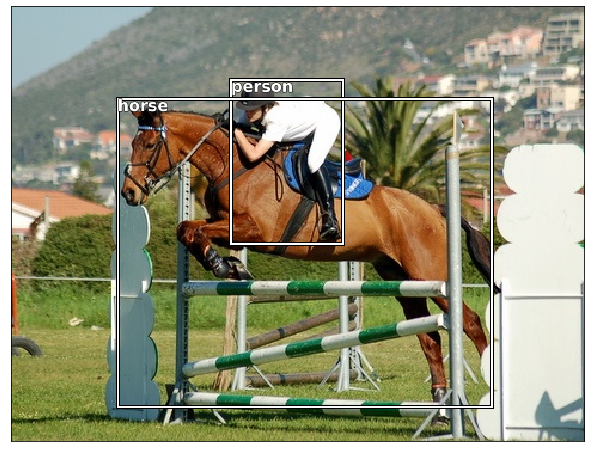

In [91]:
draw_idx(17)

In [92]:

def get_lrg(b):
    if not b: raise Exception()
    b = sorted(b, key=lambda x: np.product(x[0][-2:]-x[0][:2]), reverse=True)
    return b[0]

In [93]:
trn_lrg_anno = {a: get_lrg(b) for a,b in trn_anno.items()}


Exception: 

In [94]:
b,c = trn_lrg_anno[23]
b = bb_hw(b)
ax = show_img(open_image(IMG_PATH/trn_fns[23]), figsize=(5,10))
draw_rect(ax, b)
draw_text(ax, b[:2], cats[c], sz=16)

NameError: name 'trn_lrg_anno' is not defined

In [68]:
b,c = trn_lrg_anno[23]
b = bb_hw(b)
ax = show_img(open_image(IMG_PATH/trn_fns[23]), figsize=(5,10))
draw_rect(ax, b)
draw_text(ax, b[:2], cats[c], sz=16)

NameError: name 'trn_lrg_anno' is not defined

In [73]:
(PATH/'tmp').mkdir(exist_ok=True)
CSV = PATH/'tmp/lrg.csv'

In [74]:
df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids],
    'cat': [cats[trn_lrg_anno[o][1]] for o in trn_ids]}, columns=['fn','cat'])
df.to_csv(CSV, index=False)

NameError: name 'trn_lrg_anno' is not defined

In [75]:
f_model = resnet34
sz=224
bs=64

In [76]:
tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, crop_type=CropType.NO)
md = ImageClassifierData.from_csv(PATH, JPEGS, CSV, tfms=tfms, bs=bs)

FileNotFoundError: [Errno 2] File b'/home/raviteja/Downloads/pascal/tmp/lrg.csv' does not exist: b'/home/raviteja/Downloads/pascal/tmp/lrg.csv'

In [ ]:
b,c = trn_lrg_anno[23]
b = bb_hw(b)
ax = show_img(open_image(IMG_PATH/trn_fns[23]), figsize=(5,10))
draw_rect(ax, b)
draw_text(ax, b[:2], cats[c], sz=16)

In [ ]:
(PATH/'tmp').mkdir(exist_ok=True)
CSV = PATH/'tmp/lrg.csv'

In [ ]:
df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids],
    'cat': [cats[trn_lrg_anno[o][1]] for o in trn_ids]}, columns=['fn','cat'])
df.to_csv(CSV, index=False)

In [ ]:
f_model = resnet34
sz=224
bs=64

In [ ]:
tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, crop_type=CropType.NO)
md = ImageClassifierData.from_csv(PATH, JPEGS, CSV, tfms=tfms)

In [ ]:
x,y=next(iter(md.val_dl))

In [ ]:
show_img(md.val_ds.denorm(to_np(x))[0]);

In [ ]:
learn = ConvLearner.pretrained(f_model, md, metrics=[accuracy])
learn.opt_fn = optim.Adam

In [ ]:
lrf=learn.lr_find(1e-5,100)

In [ ]:
learn.sched.plot()

In [ ]:
learn.sched.plot(n_skip=5, n_skip_end=1)

In [ ]:
lr = 2e-2

In [ ]:
learn.fit(lr, 1, cycle_len=1)

In [ ]:
lrs = np.array([lr/1000,lr/100,lr])

In [ ]:
learn.freeze_to(-2)

In [ ]:
lrf=learn.lr_find(lrs/1000)
learn.sched.plot(1)

In [ ]:
learn.fit(lrs/5, 1, cycle_len=1)

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit(lrs/5, 1, cycle_len=2)

In [ ]:
learn.save('clas_one')

In [ ]:
learn.load('clas_one')

In [ ]:
x,y = next(iter(md.val_dl))
probs = F.softmax(predict_batch(learn.model, x), -1)
x,preds = to_np(x),to_np(probs)
preds = np.argmax(preds, -1)

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.denorm(x)[i]
    b = md.classes[preds[i]]
    ax = show_img(ima, ax=ax)
    draw_text(ax, (0,0), b)
plt.tight_layout()

In [ ]:
BB_CSV = PATH/'tmp/bb.csv'

In [ ]:
bb = np.array([trn_lrg_anno[o][0] for o in trn_ids])
bbs = [' '.join(str(p) for p in o) for o in bb]

df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids], 'bbox': bbs}, columns=['fn','bbox'])
df.to_csv(BB_CSV, index=False)

In [ ]:
BB_CSV.open().readlines()[:5]

In [ ]:
f_model=resnet34
sz=224
bs=64

In [ ]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, continuous=True)

In [ ]:
x,y=next(iter(md.val_dl))

In [ ]:
ima=md.val_ds.denorm(to_np(x))[0]
b = bb_hw(to_np(y[0])); b

In [ ]:
ax = show_img(ima)
draw_rect(ax, b)
draw_text(ax, b[:2], 'label')

In [ ]:
head_reg4 = nn.Sequential(Flatten(), nn.Linear(25088,4))
learn = ConvLearner.pretrained(f_model, md, custom_head=head_reg4)
learn.opt_fn = optim.Adam
learn.crit = nn.L1Loss()

In [ ]:
learn.summary()

In [ ]:
learn.lr_find(1e-5,100)
learn.sched.plot(5)

In [ ]:
lr = 2e-3

In [ ]:
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)

In [ ]:
lrs = np.array([lr/100,lr/10,lr])

In [ ]:
learn.freeze_to(-2)

In [ ]:
lrf=learn.lr_find(lrs/1000)
learn.sched.plot(1)

In [ ]:
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2)

In [ ]:
learn.freeze_to(-3)

In [ ]:
learn.save('reg4')

In [ ]:
learn.load('reg4')

In [ ]:
x,y = next(iter(md.val_dl))
learn.model.eval()
preds = to_np(learn.model(VV(x)))

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.denorm(to_np(x))[i]
    b = bb_hw(preds[i])
    ax = show_img(ima, ax=ax)
    draw_rect(ax, b)
plt.tight_layout()

# single object detection

In [ ]:
f_model=resnet34
sz=224
bs=64

val_idxs = get_cv_idxs(len(trn_fns))

In [ ]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms,
    continuous=True, val_idxs=val_idxs)

In [ ]:
md2 = ImageClassifierData.from_csv(PATH, JPEGS, CSV, tfms=tfms_from_model(f_model, sz))

In [ ]:
class ConcatLblDataset(Dataset):
    def __init__(self, ds, y2): self.ds,self.y2 = ds,y2
    def __len__(self): return len(self.ds)
    
    def __getitem__(self, i):
        x,y = self.ds[i]
        return (x, (y,self.y2[i]))
    #adds a second label to existing data set
    

In [ ]:
trn_ds2 = ConcatLblDataset(md.trn_ds, md2.trn_y)
val_ds2 = ConcatLblDataset(md.val_ds, md2.val_y)

In [ ]:
val_ds2[0][1]

In [ ]:
md.trn_dl.dataset = trn_ds2
md.val_dl.dataset = val_ds2

In [ ]:
x,y=next(iter(md.val_dl))

ima=md.val_ds.ds.denorm(to_np(x))[1]
b = bb_hw(to_np(y[0][1])); b

In [ ]:
ax = show_img(ima)
draw_rect(ax, b)
draw_text(ax, b[:2], md2.classes[y[1][1]])

In [ ]:
head_reg4 = nn.Sequential(
    Flatten(),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(25088,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.5),
    nn.Linear(256,4+len(cats)),
)
models = ConvnetBuilder(f_model, 0, 0, 0, custom_head=head_reg4)

learn = ConvLearner(md, models)
learn.opt_fn = optim.Adam

In [ ]:
def detn_loss(input, target):
    bb_t,c_t = target
    bb_i,c_i = input[:, :4], input[:, 4:]
    bb_i = F.sigmoid(bb_i)*224
    # I looked at these quantities separately first then picked a multiplier
    #   to make them approximately equal
    return F.l1_loss(bb_i, bb_t) + F.cross_entropy(c_i, c_t)*20

def detn_l1(input, target):
    bb_t,_ = target
    bb_i = input[:, :4]
    bb_i = F.sigmoid(bb_i)*224
    return F.l1_loss(V(bb_i),V(bb_t)).data

def detn_acc(input, target):
    _,c_t = target
    c_i = input[:, 4:]
    return accuracy(c_i, c_t)

learn.crit = detn_loss
learn.metrics = [detn_acc, detn_l1]

In [ ]:
learn.lr_find()
learn.sched.plot()

In [ ]:
lr=1e-2

In [ ]:
learn.fit(lr, 1, cycle_len=3, use_clr=(32,5))

In [ ]:
learn.save('reg1_0')

In [ ]:
learn.freeze_to(-2)

In [ ]:
lrs = np.array([lr/100, lr/10, lr])

In [ ]:
learn.lr_find(lrs/1000)
learn.sched.plot(0)

In [ ]:
learn.fit(lrs/5, 1, cycle_len=5, use_clr=(32,10))

In [ ]:
learn.save('reg1_1')

In [ ]:
learn.load('reg1_1')

In [ ]:
y = learn.predict()
x,_ = next(iter(md.val_dl))

In [ ]:
from scipy.special import expit

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.ds.denorm(to_np(x))[i]
    bb = expit(y[i][:4])*224
    b = bb_hw(bb)
    c = np.argmax(y[i][4:])
    ax = show_img(ima, ax=ax)
    draw_rect(ax, b)
    draw_text(ax, b[:2], md2.classes[c])
plt.tight_layout()